<a href="https://colab.research.google.com/github/ArySuby/Proyecto_CoderDS_SUBY_Ary2daparte/blob/main/ModeloMerlu2004_2024SinEdadCero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerias, carga de archivo y preprocesamiento de los datos**

In [1]:
# Librerias Iniciales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Carga de Archivo
from google.colab import files
uploaded = files.upload()

Saving merluza2004_2024SINEDAD0.xlsx to merluza2004_2024SINEDAD0.xlsx


In [3]:
# Lectura de archivo
df = pd.read_excel("merluza2004_2024SINEDAD0.xlsx", parse_dates=["fecha"])

In [6]:
df["sexo"] = df["sexo"].astype(str).str.strip()
print(df["sexo"].unique())


['2' '1']


In [7]:
print(df["sexo"].value_counts(dropna=False))


sexo
2    99909
1    68468
Name: count, dtype: int64


In [9]:
print(df["largo_tot"].min())
print([int(x) for x in sorted(df["largo_tot"].unique())])

15
[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 95]


In [10]:
# Previsualizacion
print("Primeras filas:")
print(df.head())
print(len(df))
print("\nColumnas disponibles:", df.columns.tolist())

Primeras filas:
       fecha  n_ejemp  largo_tot sexo  edad
0 2016-01-05        1         16    2     1
1 2016-01-05        2         19    1     1
2 2016-01-05        3         25    1     1
3 2016-01-05        4         26    1     1
4 2016-01-05        5         27    1     2
168377

Columnas disponibles: ['fecha', 'n_ejemp', 'largo_tot', 'sexo', 'edad']


In [14]:
# Preprocesamiento de los datos
#1. Convertir fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

#2. Eliminar filas con valores faltantes en columnas relevantes
df = df.dropna(subset=["largo_tot", "sexo", "edad", "fecha"])

**DEFINICION DEL MODELO**

In [16]:
# Variables predictoras y objetivo
X = df[["largo_tot", "sexo"]].copy()
y = df["edad"]

# Codificar sexo
X["sexo"] = X["sexo"].astype("category").cat.codes

In [44]:
# División de datos en entrenamiento y testeo del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                    random_state=123, stratify=X["sexo"])

In [45]:
# Modelo Lineal
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [46]:
# Evaluación
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{nombre} - RMSE:", rmse)
    print(f"{nombre} - R2:", r2)

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)


Regresión Lineal - RMSE: 0.6953271867204857
Regresión Lineal - R2: 0.7385134998163643


In [47]:
# Coeficientes del modelo
coeficientes = pd.DataFrame(lr.coef_, X.columns, columns=["Coeficiente"])
print(coeficientes)

           Coeficiente
largo_tot     0.129335
sexo         -0.458074


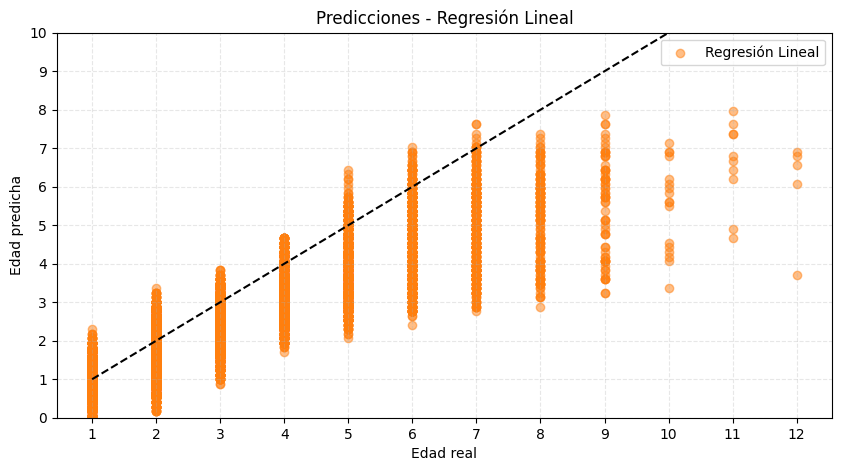

In [99]:
# Visualización Regresión Lineal
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regresión Lineal", color='C1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.xlabel("Edad real")
plt.ylabel("Edad predicha")
plt.legend()
plt.title("Predicciones - Regresión Lineal")

# Establecer ticks de uno en uno
plt.xticks(np.arange(y_test.min(), y_test.max() + 1, 1))
plt.yticks(np.arange(0, 12, 1))
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

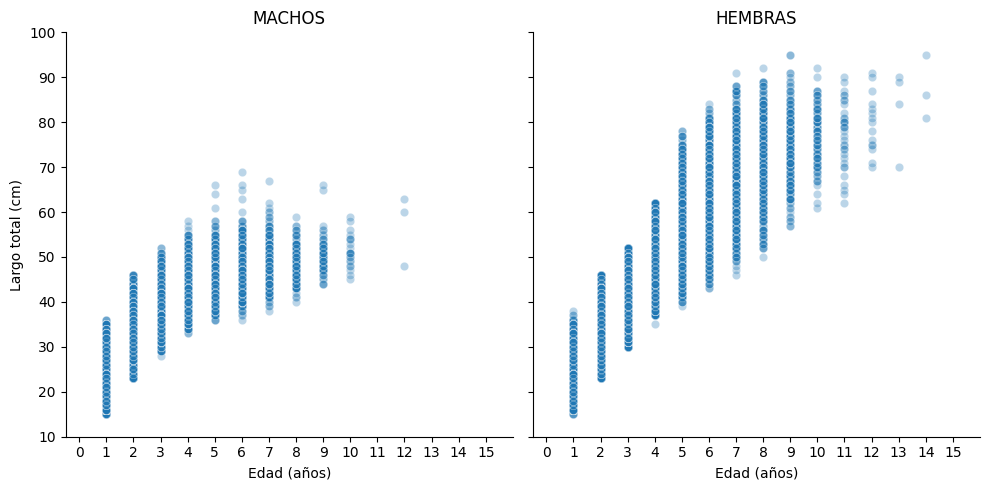

In [49]:
# Diccionario para los títulos y colores
sexo_labels = {1: "MACHOS", 2: "HEMBRAS"}
colores = {1: "blue", 2: "red"}

# Face grid por sexo con paleta para los colores
g = sns.FacetGrid(df, col="sexo", height=5, aspect=1, palette=colores)

# Map_dataframe para graficar con ejes invertidos
g.map_dataframe(sns.scatterplot, x="edad", y="largo_tot", alpha=0.3)

# Etiquetas y ejes
g.set_axis_labels("Edad (años)", "Largo total (cm)")
g.set(xticks=np.arange(0, 16, 1))       # Eje X (edad): de 0 a 12, uno en uno
g.set(xlim=(-0.5, 16))                  # Limites del eje X
g.set(yticks=np.arange(10, 101, 10))      # Eje Y (largo): de 10 a 90, diez en diez
g.set(ylim=(10, 100))                    # Limites del eje Y

# Reemplazar títulos por HEMBRAS y MACHOS
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(sexo_labels[int(title)])

plt.tight_layout()
plt.show()


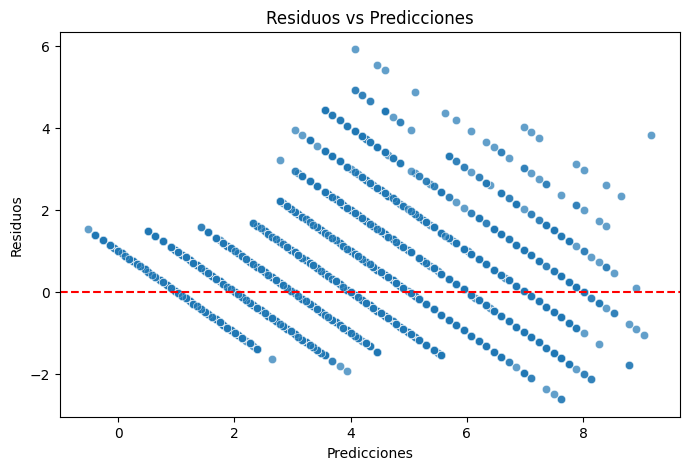

In [50]:
###SUPUESTOS A CUMPLIR###
#### 1-Linealidad: la relación entre las variables predictoras y la variable objetivo es lineal.###
#### 2-Homoscedasticidad: los residuos deben tener varianza constante.####

# Calcular residuos
y_pred = lr.predict(X_test)
residuos = y_test - y_pred

# Gráfico de residuos vs predicciones
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()


<Axes: xlabel='residuos', ylabel='Count'>

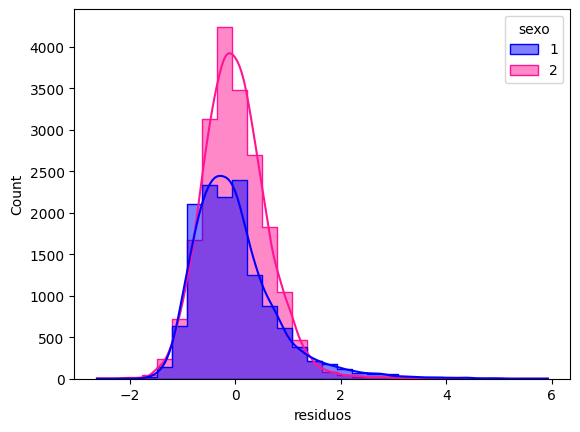

In [52]:
####SUPUESTO 3 - Prueba de normalidad de los residuos###
df["residuos"] = residuos
sns.histplot(data=df, x="residuos", hue="sexo", kde=True, bins=30,
             palette={1: "blue", 2: "deeppink"}, alpha=0.5, element="step")


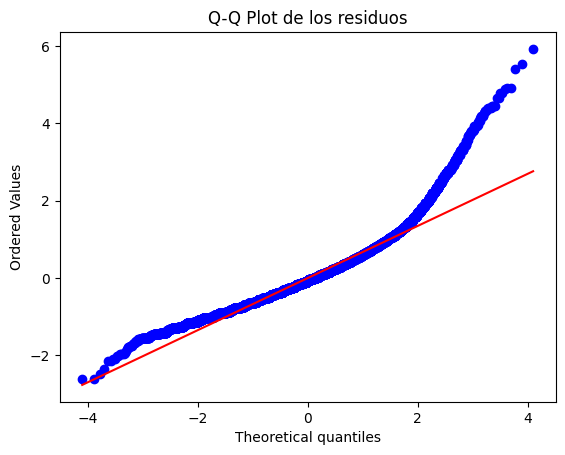

In [53]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.show()


Porcentaje de acierto exacto - Regresión Lineal: 60.13%


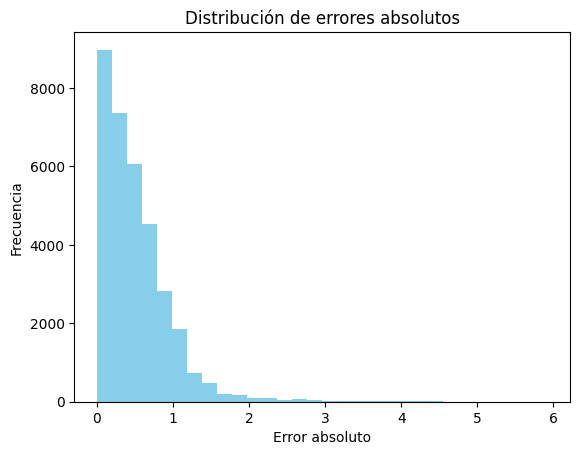

In [54]:
# Predicciones del modelo lineal
predicciones_lr = y_pred_lr

# 20% de margen de error
margen_error = 0.20
limite_superior = y_test * (1 + margen_error)
limite_inferior = y_test * (1 - margen_error)

# Calcular aciertos
aciertos = (predicciones_lr >= limite_inferior) & (predicciones_lr <= limite_superior)
porcentaje_acierto_lr = aciertos.mean() * 100
print(f"Porcentaje de acierto exacto - Regresión Lineal: {porcentaje_acierto_lr:.2f}%")

# Calcular errores absolutos y graficar histograma
errores = abs(y_test - predicciones_lr)
plt.hist(errores, bins=30, color='skyblue')
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.title("Distribución de errores absolutos")
plt.show()

        edad  predicciones_lr   errores
191       10         5.625219  4.374781
1661       9         4.331865  4.668135
3792       9         4.073194  4.926806
4003      14         8.012525  5.987475
4056      12         5.754554  6.245446
...      ...              ...       ...
167819     9         4.908475  4.091525
167892     9         3.685188  5.314812
168032     9         3.943859  5.056141
168138     8         3.685188  4.314812
168155    11         6.589835  4.410165

[192 rows x 3 columns]


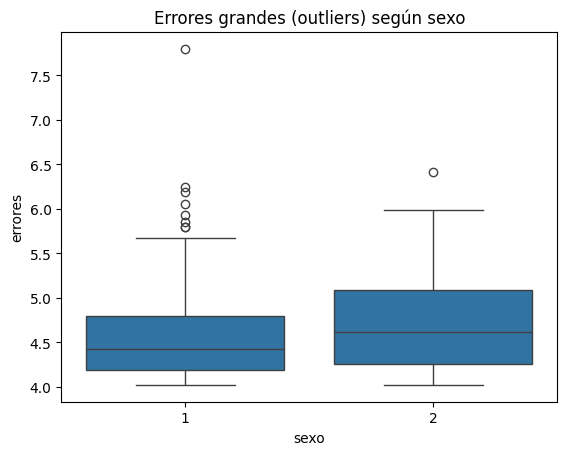

In [55]:
# Predecir para todo el DataFrame
y_pred_lr_full = lr.predict(X)  # Usar X completo, no solo X_test

# Agregar las predicciones al DataFrame
df["predicciones_lr"] = y_pred_lr_full

# Calcular los errores absolutos
df["errores"] = abs(df["edad"] - df["predicciones_lr"])

# Filtrar los outliers (errores absolutos mayores a 4)
outliers = df[df["errores"] > 4]

# Mostrar los outliers
print(outliers[["edad", "predicciones_lr", "errores"]])

# Visualización de outliers según sexo
sns.boxplot(data=outliers, x="sexo", y="errores")
plt.title("Errores grandes (outliers) según sexo")
plt.show()



        edad  predicciones_lr   errores
4003      14         8.012525  5.987475
4056      12         5.754554  6.245446
14547     10         4.978542  5.021458
21154     10         4.202530  5.797470
28592     10         4.331865  5.668135
37255     10         4.719871  5.280129
37599      9         3.943859  5.056141
40922     10         4.978542  5.021458
41121     10         4.461200  5.538800
45177     10         4.331865  5.668135
57276     10         4.590536  5.409464
63157     14         8.659202  5.340798
69866     10         4.590536  5.409464
74503     10         4.073194  5.926806
77107      9         3.685188  5.314812
83493     10         4.849207  5.150793
84124     12         6.589835  5.410165
88671      9         3.814523  5.185477
89244     10         3.814523  6.185477
91822      9         3.814523  5.185477
92677     12         4.202530  7.797470
108678     9         3.685188  5.314812
113953    10         4.590536  5.409464
122739    12         6.719170  5.280830


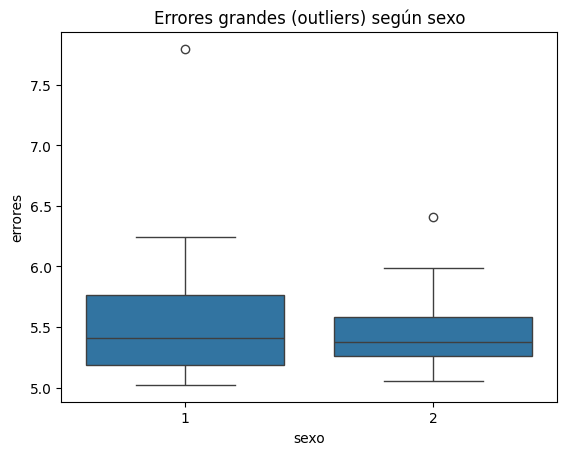

In [56]:
# Calcular los errores absolutos
df["errores"] = abs(df["edad"] - df["predicciones_lr"])

# Filtrar los outliers (errores absolutos mayores a 5)
outliers = df[df["errores"] > 5]

# Mostrar los outliers
print(outliers[["edad", "predicciones_lr", "errores"]])

# Visualización de outliers según sexo
sns.boxplot(data=outliers, x="sexo", y="errores")
plt.title("Errores grandes (outliers) según sexo")
plt.show()


In [57]:
# Filtrar los ejemplares con un residuo mayor o igual a 6
outliers = df[df["errores"] >= 6]

# Mostrar largo, edad y sexo de los ejemplares con error mayor o igual a 6
print(outliers[["edad", "largo_tot", "sexo", "errores"]])


        edad  largo_tot  sexo   errores
4056      12         60     1  6.245446
89244     10         45     1  6.185477
92677     12         48     1  7.797470
135116    13         70     2  6.410165
152419    10         46     1  6.056141


In [58]:
# Reemplazar 0 por 2 (hembras)
X_test["sexo"] = X_test["sexo"].replace(0, 2)


In [59]:
print(X_test["sexo"].value_counts())


sexo
1    19982
2    13694
Name: count, dtype: int64


In [60]:
# --- Armar DataFrame con resultados ---
df_resultados = X_test.copy()
df_resultados["edad_real"] = y_test
df_resultados["edad_predicha"] = y_pred_lr

# --- Calcular métricas separadas por sexo ---
for sexo_valor in [1, 2]:
    sub = df_resultados[df_resultados["sexo"] == sexo_valor]

    # 1. Acierto con margen del 20%
    margen_error = 0.20
    limite_sup = sub["edad_real"] * (1 + margen_error)
    limite_inf = sub["edad_real"] * (1 - margen_error)
    aciertos_20 = ((sub["edad_predicha"] >= limite_inf) & (sub["edad_predicha"] <= limite_sup)).mean() * 100

    # 2. Acierto exacto (redondeando la predicción)
    aciertos_exactos = (sub["edad_predicha"].round() == sub["edad_real"]).mean() * 100

    # 3. Acierto con margen de ±1 año
    aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad_real"]) <= 1).mean() * 100

    print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ---")
    print(f"Acierto con margen del 20%: {aciertos_20:.2f}%")
    print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
    print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


--- MACHO ---
Acierto con margen del 20%: 64.48%
Acierto exacto (redondeo): 61.64%
Acierto con ±1 año de diferencia: 90.71%

--- HEMBRA ---
Acierto con margen del 20%: 53.77%
Acierto exacto (redondeo): 51.93%
Acierto con ±1 año de diferencia: 85.41%



In [67]:
# --- Armar DataFrame con resultados ---
df_resultados = X_test.copy()
df_resultados["edad_real"] = y_test
df_resultados["edad_predicha"] = y_pred_lr

# --- Calcular métricas separadas por sexo y por tamaño ---
for sexo_valor in [1, 2]:
    for condicion, filtro_texto in [(df_resultados["largo_tot"] < 34, "Menores a 34 cm"),
                                    (df_resultados["largo_tot"] >= 34, "Mayores o iguales a 34 cm")]:

        sub = df_resultados[(df_resultados["sexo"] == sexo_valor) & condicion]

        if len(sub) == 0:
            continue  # evitar divisiones por cero si no hay datos

        # 1. Acierto exacto (redondeando la predicción)
        aciertos_exactos = (sub["edad_predicha"].round() == sub["edad_real"]).mean() * 100

        # 2. Acierto con margen de ±1 año
        aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad_real"]) <= 1).mean() * 100

        print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ({filtro_texto}) ---")
        print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
        print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


--- MACHO (Menores a 34 cm) ---
Acierto exacto (redondeo): 68.40%
Acierto con ±1 año de diferencia: 93.97%

--- MACHO (Mayores o iguales a 34 cm) ---
Acierto exacto (redondeo): 60.08%
Acierto con ±1 año de diferencia: 89.95%

--- HEMBRA (Menores a 34 cm) ---
Acierto exacto (redondeo): 70.38%
Acierto con ±1 año de diferencia: 94.18%

--- HEMBRA (Mayores o iguales a 34 cm) ---
Acierto exacto (redondeo): 44.16%
Acierto con ±1 año de diferencia: 81.71%



In [68]:
# --- Calcular métricas separadas por sexo y por tamaño ---
for sexo_valor in [1, 2]:
    if sexo_valor == 1:  # Macho: dos grupos como antes
        filtros = [
            (df_resultados["largo_tot"] < 34, "Menores a 34 cm"),
            (df_resultados["largo_tot"] >= 34, "Mayores o iguales a 34 cm")
        ]
    else:  # Hembra: tres grupos nuevos
        filtros = [
            (df_resultados["largo_tot"] < 34, "Menores a 34 cm"),
            ((df_resultados["largo_tot"] >= 34) & (df_resultados["largo_tot"] <= 50), "Entre 34 y 50 cm"),
            (df_resultados["largo_tot"] > 50, "Mayores a 50 cm")
        ]

    for condicion, filtro_texto in filtros:
        sub = df_resultados[(df_resultados["sexo"] == sexo_valor) & condicion]

        if len(sub) == 0:
            continue  # evitar divisiones por cero si no hay datos

        # 1. Acierto exacto (redondeando la predicción)
        aciertos_exactos = (sub["edad_predicha"].round() == sub["edad_real"]).mean() * 100

        # 2. Acierto con margen de ±1 año
        aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad_real"]) <= 1).mean() * 100

        print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ({filtro_texto}) ---")
        print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
        print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


--- MACHO (Menores a 34 cm) ---
Acierto exacto (redondeo): 68.40%
Acierto con ±1 año de diferencia: 93.97%

--- MACHO (Mayores o iguales a 34 cm) ---
Acierto exacto (redondeo): 60.08%
Acierto con ±1 año de diferencia: 89.95%

--- HEMBRA (Menores a 34 cm) ---
Acierto exacto (redondeo): 70.38%
Acierto con ±1 año de diferencia: 94.18%

--- HEMBRA (Entre 34 y 50 cm) ---
Acierto exacto (redondeo): 44.39%
Acierto con ±1 año de diferencia: 82.17%

--- HEMBRA (Mayores a 50 cm) ---
Acierto exacto (redondeo): 25.83%
Acierto con ±1 año de diferencia: 45.83%



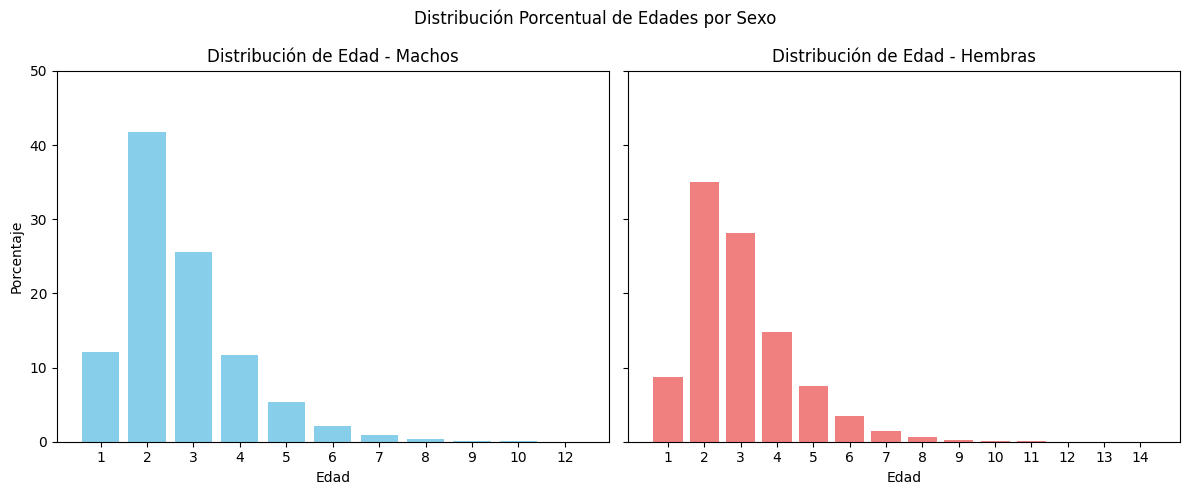

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Asegurarse de tener la columna 'sexo' y 'edad' en el DataFrame original
# 1 = Macho, 2 = Hembra

# Agrupar por sexo y contar proporciones
edad_machos = df[df["sexo"] == 1]["edad"].value_counts(normalize=True).sort_index()
edad_hembras = df[df["sexo"] == 2]["edad"].value_counts(normalize=True).sort_index()

# Convertir a porcentaje
edad_machos *= 100
edad_hembras *= 100

# Crear gráfico
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Graficar machos
ax[0].bar(edad_machos.index.astype(str), edad_machos.values, color="skyblue")
ax[0].set_title("Distribución de Edad - Machos")
ax[0].set_xlabel("Edad")
ax[0].set_ylabel("Porcentaje")
ax[0].set_ylim(0, 50)

# Graficar hembras
ax[1].bar(edad_hembras.index.astype(str), edad_hembras.values, color="lightcoral")
ax[1].set_title("Distribución de Edad - Hembras")
ax[1].set_xlabel("Edad")
ax[1].set_ylim(0, 50)

plt.suptitle("Distribución Porcentual de Edades por Sexo")
plt.tight_layout()
plt.show()


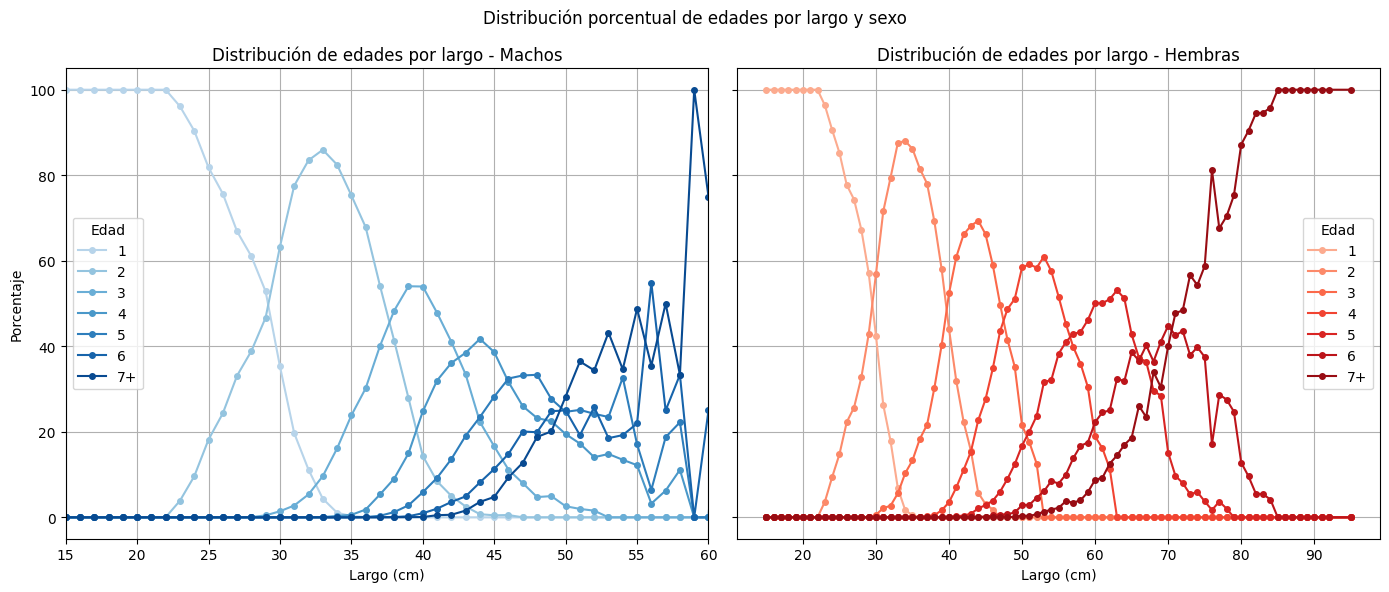

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import to_hex

# Crear nueva columna de edad agrupada
df["edad_grupo"] = df["edad"].apply(lambda x: str(x) if x < 7 else "7+")

# Función para calcular la proporción de cada edad por largo
def proporciones_por_largo(df_sexo):
    tabla = pd.crosstab(df_sexo["largo_tot"], df_sexo["edad_grupo"], normalize='index') * 100
    edades_ordenadas = [str(i) for i in range(1, 7)] + ["7+"]
    tabla = tabla[edades_ordenadas]
    return tabla

# Aplicar por sexo
tabla_machos = proporciones_por_largo(df[df["sexo"] == 1])
tabla_hembras = proporciones_por_largo(df[df["sexo"] == 2])

# Paletas pastel azules y rosas (rojos claros)
colores_machos = plt.cm.Blues(np.linspace(0.3, 0.9, len(tabla_machos.columns)))
colores_hembras = plt.cm.Reds(np.linspace(0.3, 0.9, len(tabla_hembras.columns)))

# Graficar
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Machos
for i, col in enumerate(tabla_machos.columns):
    ax[0].plot(tabla_machos.index, tabla_machos[col], label=col, color=to_hex(colores_machos[i]), marker='o', markersize=4)
ax[0].set_title("Distribución de edades por largo - Machos")
ax[0].set_ylabel("Porcentaje")
ax[0].set_xlabel("Largo (cm)")
ax[0].legend(title="Edad")
ax[0].grid(True)
ax[0].set_xlim(15,60)

# Hembras
for i, col in enumerate(tabla_hembras.columns):
    ax[1].plot(tabla_hembras.index, tabla_hembras[col], label=col, color=to_hex(colores_hembras[i]), marker='o', markersize=4)
ax[1].set_title("Distribución de edades por largo - Hembras")
ax[1].set_xlabel("Largo (cm)")
ax[1].legend(title="Edad")
ax[1].grid(True)

plt.suptitle("Distribución porcentual de edades por largo y sexo")
plt.tight_layout()
plt.show()


In [101]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

# 1. Función de von Bertalanffy
def von_bertalanffy(t, Linf, k, t0):
    return Linf * (1 - np.exp(-k * (t - t0)))

# 2. Función inversa: predecir edad a partir de largo
def predecir_edad(largo, Linf, k, t0):
    largo = np.clip(largo, 0, Linf - 0.01)  # evitar log de cero o negativo
    return t0 - (1 / k) * np.log(1 - largo / Linf)

# 3. Ajustar modelo por sexo
machos = df[df["sexo"] == 1]
hembras = df[df["sexo"] == 2]

params_machos, _ = curve_fit(von_bertalanffy, machos["edad"], machos["largo_tot"], bounds=(0, [80, 1, 17]))
params_hembras, _ = curve_fit(von_bertalanffy, hembras["edad"], hembras["largo_tot"], bounds=(0, [115, 1, 17]))

print("Machos - Linf, k, t0:", params_machos)
print("Hembras - Linf, k, t0:", params_hembras)

# 4. Predecir edad usando el modelo inverso
df_resultados = df.copy()
df_resultados["edad_predicha"] = df_resultados.apply(
    lambda row: predecir_edad(
        row["largo_tot"],
        *params_machos if row["sexo"] == 1 else params_hembras
    ),
    axis=1
)

# 5. Evaluar aciertos por sexo y tamaño
for sexo_valor in [1, 2]:
    if sexo_valor == 1:
        filtros = [
            (df_resultados["largo_tot"] < 34, "Menores a 34 cm"),
            (df_resultados["largo_tot"] >= 34, "Mayores o iguales a 34 cm")
        ]
    else:
        filtros = [
            (df_resultados["largo_tot"] < 34, "Menores a 34 cm"),
            ((df_resultados["largo_tot"] >= 34) & (df_resultados["largo_tot"] <= 50), "Entre 34 y 50 cm"),
            (df_resultados["largo_tot"] > 50, "Mayores a 50 cm")
        ]

    for condicion, filtro_texto in filtros:
        sub = df_resultados[(df_resultados["sexo"] == sexo_valor) & condicion]

        if len(sub) == 0:
            continue

        aciertos_exactos = (sub["edad_predicha"].round() == sub["edad"]).mean() * 100
        aciertos_margen1 = (abs(sub["edad_predicha"] - sub["edad"]) <= 1).mean() * 100

        print(f"--- {'MACHO' if sexo_valor == 1 else 'HEMBRA'} ({filtro_texto}) ---")
        print(f"Acierto exacto (redondeo): {aciertos_exactos:.2f}%")
        print(f"Acierto con ±1 año de diferencia: {aciertos_margen1:.2f}%\n")


Machos - Linf, k, t0: [4.36271990e+01 7.96612032e-01 1.02186193e-12]
Hembras - Linf, k, t0: [6.71020451e+01 3.63947522e-01 1.49515966e-17]
--- MACHO (Menores a 34 cm) ---
Acierto exacto (redondeo): 72.59%
Acierto con ±1 año de diferencia: 96.89%

--- MACHO (Mayores o iguales a 34 cm) ---
Acierto exacto (redondeo): 46.44%
Acierto con ±1 año de diferencia: 69.60%

--- HEMBRA (Menores a 34 cm) ---
Acierto exacto (redondeo): 74.37%
Acierto con ±1 año de diferencia: 98.36%

--- HEMBRA (Entre 34 y 50 cm) ---
Acierto exacto (redondeo): 65.55%
Acierto con ±1 año de diferencia: 92.78%

--- HEMBRA (Mayores a 50 cm) ---
Acierto exacto (redondeo): 30.54%
Acierto con ±1 año de diferencia: 49.98%



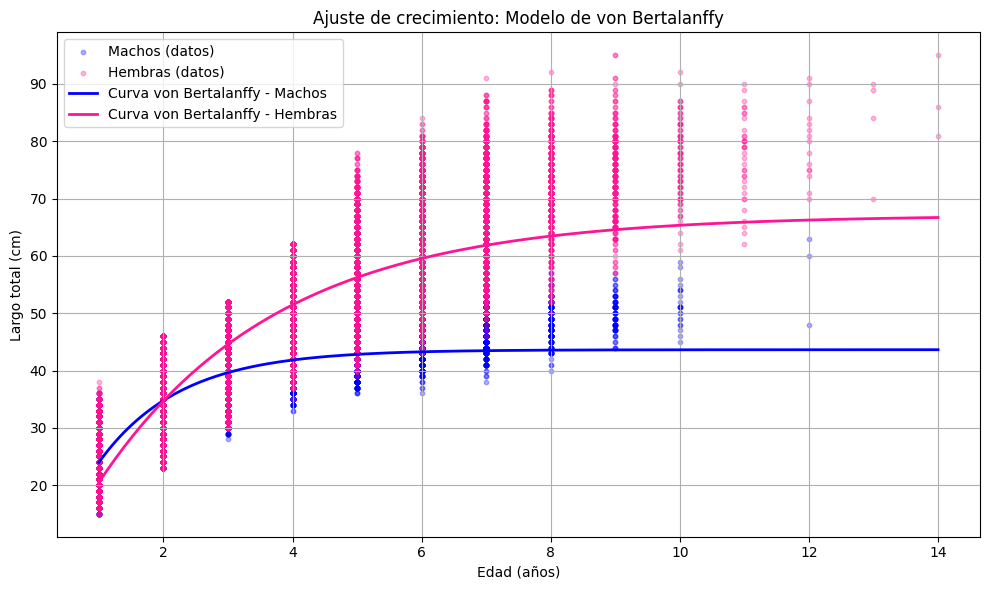

Parámetros ajustados - Machos (Linf, k, t0): [4.36271659e+01 7.96614148e-01 5.41885127e-15]
Parámetros ajustados - Hembras (Linf, k, t0): [6.71020451e+01 3.63947522e-01 1.49515966e-17]


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Función de crecimiento de von Bertalanffy ---
def von_bertalanffy(t, Linf, k, t0):
    return Linf * (1 - np.exp(-k * (t - t0)))

# --- Separar machos y hembras ---
machos = df[df["sexo"] == 1]
hembras = df[df["sexo"] == 2]

# --- Ajustar modelo para machos ---
params_machos, _ = curve_fit(
    von_bertalanffy,
    machos["edad"],
    machos["largo_tot"],
    bounds=(0, [90, 1, 17])
)

# --- Ajustar modelo para hembras ---
params_hembras, _ = curve_fit(
    von_bertalanffy,
    hembras["edad"],
    hembras["largo_tot"],
    bounds=(0, [115, 1, 17])
)

# --- Crear edades para graficar la curva suavemente ---
edades_suavizadas = np.linspace(df["edad"].min(), df["edad"].max(), 200)

# --- Calcular predicciones con los parámetros ajustados ---
pred_machos = von_bertalanffy(edades_suavizadas, *params_machos)
pred_hembras = von_bertalanffy(edades_suavizadas, *params_hembras)

# --- Graficar ---
plt.figure(figsize=(10, 6))

# Datos reales
plt.scatter(machos["edad"], machos["largo_tot"], label="Machos (datos)", alpha=0.3, color="blue", s=10)
plt.scatter(hembras["edad"], hembras["largo_tot"], label="Hembras (datos)", alpha=0.3, color="deeppink", s=10)

# Curvas ajustadas
plt.plot(edades_suavizadas, pred_machos, label="Curva von Bertalanffy - Machos", color="blue", linewidth=2)
plt.plot(edades_suavizadas, pred_hembras, label="Curva von Bertalanffy - Hembras", color="deeppink", linewidth=2)

# Opciones de gráfico
plt.title("Ajuste de crecimiento: Modelo de von Bertalanffy")
plt.xlabel("Edad (años)")
plt.ylabel("Largo total (cm)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Mostrar parámetros ajustados
print("Parámetros ajustados - Machos (Linf, k, t0):", params_machos)
print("Parámetros ajustados - Hembras (Linf, k, t0):", params_hembras)
